<img width="300" alt="creating a repo" src="https://raw.githubusercontent.com/Ahrkano/Projeto_Probabilidade/master/imagens/logo_UFRN.jpg">
<img width="200" alt="creating a repo" src="https://raw.githubusercontent.com/Ahrkano/Projeto_Probabilidade/master/imagens/logo_imd.png">

# Introdução

**Dados abertos (open data)** correspondem à ideia de que certos dados devem estar disponíveis para que todos usem e publiquem, **sem restrições de direitos autorais e patentes** ou outros mecanismos de controle. Segundo a **Open Definition** dados abertos são dados que podem ser **livremente utilizados**, **reutilizados** e **redistribuídos** por qualquer pessoa – sujeitos, no máximo, à exigência de atribuição à fonte original e ao compartilhamento pelas mesmas licenças em que as informações foram apresentadas. Ou seja, a abertura de dados evita que mecanismo restritivos possam ser aplicados para esconder dados, permitindo que tanto pessoas físicas quanto jurídicas possam explorar estes dados de forma livre.

O **Portal de Dados Abertos** da **UFRN** tem como objetivo disponibilizar para toda a comunidade dados e informações públicas da Instituição, que podem ser usadas no desenvolvimento de aplicativos e ações.
Desse modo, todos os dados utilizados neste estudo podem ser verificados em : http://dados.ufrn.br/group/ensino


# Objetivo

O movimento de abertura de dados de universidades é importante pois permite que dados sejam utilizados para produção de **análises**, **produção de conhecimento**, **inovação** e **conhecimento prévio**. Pensando nisto, este estudo tem por objetivo explorar as informações acerca dos docentes da **UFRN**, mais especificamente os docentes vinculados ao **Insituto Metrópole Digital (IMD)** e estabelecer uma comparação entre a **porcentagem de alunos aprovados** por cada docente e as notas de **avaliação de docência** geradas ao final de cada período letivo.

# Importando bibliotecas

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importando dados

In [2]:
#Avaliações de docência
nota_docente_url = 'https://bit.ly/2IqonoW'

#Componentes curriculares presenciais
disciplinas_url = 'https://bit.ly/2yIvZLs'

#Turmas de 2015.1 até 2017.1
turmas_2017_1_url = 'https://bit.ly/2wn1AFI'
turmas_2016_2_url = 'https://bit.ly/2I14eGu'
turmas_2016_1_url = 'https://bit.ly/2IoXKAG'
turmas_2015_2_url = 'https://bit.ly/2wrhMpw'
turmas_2015_1_url = 'https://bit.ly/2IaxFC5'

#Matrículas em componentes de 2015.1 até 2017.1
notas_2017_1_url = 'https://bit.ly/2KMoTvS'
notas_2016_2_url = 'https://bit.ly/2rup6Ma'
notas_2016_1_url = 'https://bit.ly/2K7oy5w'
notas_2015_2_url = 'https://bit.ly/2rvknKb'
notas_2015_1_url = 'https://bit.ly/2I8YfeM'

#Docentes da ufrn atualizado em 2018
docentes_url = 'https://bit.ly/2FSFJ8B'

#Dataframe das turmas
turmas_2017_1 = pd.read_csv(turmas_2017_1_url, sep=';')
turmas_2016_2 = pd.read_csv(turmas_2016_2_url, sep=';')
turmas_2016_1 = pd.read_csv(turmas_2016_1_url, sep=';')
turmas_2015_2 = pd.read_csv(turmas_2015_2_url, sep=';')
turmas_2015_1 = pd.read_csv(turmas_2015_1_url, sep=';')

#Dataframe das matriculas em componentes
notas_2017_1 = pd.read_csv(notas_2017_1_url, sep=';')
notas_2016_2 = pd.read_csv(notas_2016_2_url, sep=';')
notas_2016_1 = pd.read_csv(notas_2016_1_url, sep=';')
notas_2015_2 = pd.read_csv(notas_2015_2_url, sep=';')
notas_2015_1 = pd.read_csv(notas_2015_1_url, sep=';')


#Dataframe dos componentes curriculares presenciais
#realizado um filtro apenas por colunas mais importantes
disciplinas = pd.read_csv(disciplinas_url, sep=';', 
                          usecols=["id_componente","codigo","nivel","nome","unidade_responsavel"])

#Dataframe da avaliação dos docentes
#filtrando notas dos docentes
nota_docente = pd.read_csv(nota_docente_url, sep=';',
                           usecols=["id_docente", "nome_docente", "id_turma", "ano", 
                                    "autoavaliacao_aluno_media", "atuacao_profissional_media", 
                                    "postura_profissional_media" ])
#Dataframe de docentes da ufrn
docentes = pd.read_csv(docentes_url, sep=';')

# Preparação e Limpeza dos dados

### Filtrando Dataframe Turmas

In [3]:
#selecionando apenas as colunas necessárias
turmas_cols = ['id_turma', 'codigo_turma', 'id_docente_interno','id_componente_curricular', 'nivel_ensino',
               'local', 'ano', 'periodo', 'descricao_horario',  'capacidade_aluno', 'tipo',
               'data_consolidacao',  'situacao_turma', 'modalidade_participantes']


turmas_2015_1 = turmas_2015_1[turmas_cols]
turmas_2015_2 = turmas_2015_2[turmas_cols]
turmas_2016_1 = turmas_2015_1[turmas_cols]
turmas_2016_2 = turmas_2015_2[turmas_cols]
turmas_2017_1 = turmas_2015_1[turmas_cols]

#concatenando verticalmente todas as turmas em um so dataframe
frames = [turmas_2015_1, turmas_2015_2, turmas_2016_1, turmas_2016_2, turmas_2017_1]
turmas_total = pd.concat(frames)

# Adaptando o dataframe turma e disciplinas para o merge
# Esse procedimento é necessário pois o dataframe turma está codificado com ids
# A coluna id_componente precisa ser a mesma em ambos os dataframes
turmas_total.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)

# id_componente em ambos os dataframes precisam ser do mesmo tipo
turmas_total.id_componente = turmas_total.id_componente.astype(str)

# investigando os dados
turmas_total.head()

,id_turma,codigo_turma,id_docente_interno,id_componente,nivel_ensino,local,ano,periodo,descricao_horario,capacidade_aluno,tipo,data_consolidacao,situacao_turma,modalidade_participantes
0,1217099,01,18225.0,52922,LATO SENSU,Depto. de Oceanografia e Limnologia,2015,1,23456T234,26.0,REGULAR,2015-06-01 12:53:14.625,CONSOLIDADA,Presencial
1,1217100,01,18695.0,52921,LATO SENSU,Depto. de Oceanografia e Limnologia,2015,1,345T2345 6T234 (14/04/2015 - 17/04/2015),26.0,REGULAR,2015-10-08 16:19:21.901,CONSOLIDADA,Presencial
2,1217101,01,5753068.0,52925,LATO SENSU,Depto. de Oceanografia e Limnologia,2015,1,23456T123456,26.0,REGULAR,2015-06-01 12:50:38.962,CONSOLIDADA,Presencial
3,1217102,01,NaN,52920,LATO SENSU,Depto. de Oceanografia e Limnologia,2015,1,23456T123456,26.0,REGULAR,2015-08-26 11:48:34.146,CONSOLIDADA,Presencial
4,1217102,01,NaN,52920,LATO SENSU,Depto. de Oceanografia e Limnologia,2015,1,23456T123456,26.0,REGULAR,2015-08-26 11:48:34.146,CONSOLIDADA,Presencial


### Filtrando Dataframe Matrículas

In [4]:
#selecionando apenas as colunas necessárias
notas_cols = ['id_turma', 'discente', 'id_curso', 'unidade', 'nota', 'media_final', 'descricao']

notas_2015_1 = notas_2015_1[notas_cols]
notas_2015_2 = notas_2015_2[notas_cols]
notas_2016_1 = notas_2016_1[notas_cols]
notas_2016_2 = notas_2016_2[notas_cols]
notas_2017_1 = notas_2017_1[notas_cols]

#concatenando verticalmente
frames = [notas_2015_1, notas_2015_2, notas_2016_1, notas_2016_2, notas_2017_1]
notas_total = pd.concat(frames)

# Limpando o dataframe disciplinas com linhas desnecessárias
disciplinas.dropna(inplace=True)
disciplinas = disciplinas[~disciplinas.id_componente.duplicated()]

# investigando os dados
notas_total.head()

,id_turma,discente,id_curso,unidade,nota,media_final,descricao
0,57562481,8833c0e056f90497742882bfcc81b685,100300443.0,2.0,0.0,0.0,REPROVADO
1,57562481,8833c0e056f90497742882bfcc81b685,100300443.0,3.0,0.0,0.0,REPROVADO
2,57562481,7a0a661326418111f7d17aab098757aa,100300443.0,1.0,8.9,8.9,APROVADO
3,57562481,7a0a661326418111f7d17aab098757aa,100300443.0,2.0,8.9,8.9,APROVADO
4,57562481,7a0a661326418111f7d17aab098757aa,100300443.0,3.0,8.9,8.9,APROVADO


### Limpando Dataframe de avaliação de docentes

In [5]:
#restringindo as avalicoes aos anos de 2015, 2016 e 2017
anos = [2015,2016,2017]

tabela_notas_final = nota_docente.loc[nota_docente["ano"].isin(anos)]

#investigando os dados
tabela_notas_final.head()

,id_docente,nome_docente,id_turma,ano,postura_profissional_media,atuacao_profissional_media,autoavaliacao_aluno_media
5,15370,FERNANDO MOREIRA DA SILVA,1241962,2015,9.43,6.68,8.55
6,15370,FERNANDO MOREIRA DA SILVA,1242092,2015,9.56,7.59,8.59
7,15370,FERNANDO MOREIRA DA SILVA,57563299,2015,8.82,7.05,8.61
8,15370,FERNANDO MOREIRA DA SILVA,57574771,2016,9.75,9.27,9.07
9,15370,FERNANDO MOREIRA DA SILVA,57575077,2016,9.68,7.95,8.60


In [6]:
#calculando media das avaliacoes de cada docente
nota_docente_media = tabela_notas_final.groupby('nome_docente',as_index=False).mean()

#extraindo apenas as colunas necessarias
info = ['nome_docente', 'autoavaliacao_aluno_media']

nota_docente_media = nota_docente_media[info]

#investigando dados
nota_docente_media.head()

,nome_docente,autoavaliacao_aluno_media
0,ABDO FARRET NETO,9.628438
1,ABMAEL BEZERRA DE OLIVEIRA,8.832727
2,ABRAHAO SANDERSON NUNES FERNANDES DA SILVA,8.810000
3,ACHILLES DE SOUZA ANDRADE,9.713750
4,ADA CRISTINA SCUDELARI,8.695455


### Mesclando informações

In [7]:
# Fazendo um merge entre o dataframe turmas e disciplinas utilizando como base a coluna id_componente
colunas = ["id_turma","id_docente_interno","codigo","nivel_ensino","nome","unidade_responsavel",
          "situacao_turma","capacidade_aluno","descricao_horario", "ano", "periodo"]

# merge os dois dataframes utilizando como base a coluna id_componente
merge_turmas_disciplinas = pd.merge(turmas_total, disciplinas, on='id_componente')[colunas]

merge_turmas_disciplinas.dropna(inplace=True)

merge_turmas_disciplinas.drop_duplicates(subset='id_turma', keep='first', inplace=True)

# investigando os dados
merge_turmas_disciplinas.head()

,id_turma,id_docente_interno,codigo,nivel_ensino,nome,unidade_responsavel,situacao_turma,capacidade_aluno,descricao_horario,ano,periodo
0,1217099,18225.0,DOL0009,LATO SENSU,Seminário de Simulação (Estudos de caso),DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,CONSOLIDADA,26.0,23456T234,2015,1
3,1217100,18695.0,DOL0008,LATO SENSU,: Seminário sobre Políticas Públicas para o De...,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,CONSOLIDADA,26.0,345T2345 6T234 (14/04/2015 - 17/04/2015),2015,1
4,57573036,5753068.0,DOL0008,LATO SENSU,: Seminário sobre Políticas Públicas para o De...,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,CONSOLIDADA,2.0,56M12,2015,2
8,1217101,5753068.0,DOL0012,LATO SENSU,Gestão Integrada da Zona Costeira,DEPARTAMENTO DE OCEANOGRAFIA E LIMNOLOGIA,CONSOLIDADA,26.0,23456T123456,2015,1
17,1237217,26152.0,DOD1421,LATO SENSU,CARIOLOGIA,DEPARTAMENTO DE ODONTOLOGIA,CONSOLIDADA,12.0,6T2345,2015,1


### Filtrando dados relativos ao IMD

In [8]:
# filtrando as turmas com código IMD
turmas_total = merge_turmas_disciplinas[merge_turmas_disciplinas.codigo.str.contains("IMD")]

# utilizar apenas disciplinas com código "CONSOLIDADA"
turmas_total = turmas_total[turmas_total.situacao_turma == 'CONSOLIDADA']

# Adaptar o nome da coluna id_docente_interno para id_servidor
turmas_total.rename(columns={'id_docente_interno': 'id_servidor'}, inplace=True)

turmas_total.capacidade_aluno = turmas_total.capacidade_aluno.astype(np.int64)

# Adaptar os tipos de dados em turmas para o merge com o dataframe docentes
turmas_total.id_servidor = turmas_total.id_servidor.astype(np.int64)

# merge dos dataframes  turmas_imd e docentes utilizando como base a coluna id_servidor
colunas = ["id_turma", "codigo", "nivel_ensino", "nome_y", "codigo", "nivel_ensino",
          "nome_x","capacidade_aluno", "descricao_horario"]

turmas_nomesprof = pd.merge(turmas_total, docentes, on='id_servidor')[colunas]

# investigando os dados
turmas_nomesprof.head()

,id_turma,codigo,nivel_ensino,nome_y,codigo,nivel_ensino,nome_x,capacidade_aluno,descricao_horario
0,1239374,IMD0019,GRADUAÇÃO,CHARLES ANDRYE GALVAO MADEIRA,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,67,236M1234 (02/02/2015 - 20/06/2015)
1,1239381,IMD0019,GRADUAÇÃO,CHARLES ANDRYE GALVAO MADEIRA,IMD0019,GRADUAÇÃO,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,66,236M1234 (02/02/2015 - 20/06/2015)
2,57571383,IMD0030,GRADUAÇÃO,CHARLES ANDRYE GALVAO MADEIRA,IMD0030,GRADUAÇÃO,LINGUAGEM DE PROGRAMAÇÃO I,40,35M56 (27/07/2015 - 19/12/2015)
3,1239554,IMD0101,GRADUAÇÃO,CHARLES ANDRYE GALVAO MADEIRA,IMD0101,GRADUAÇÃO,TÓPICOS ESPECIAIS EM TECNOLOGIA DA INFORMAÇÃO II,40,6M3456 (02/02/2015 - 20/06/2015)
4,57565081,IMD0522,GRADUAÇÃO,CHARLES ANDRYE GALVAO MADEIRA,IMD0522,GRADUAÇÃO,JOGOS DIGITAIS COMO FERRAMENTA PEDAGÓGICA,60,35T56 (27/07/2015 - 19/12/2015)


### Calculando porcentagem de aprovação por turma

In [9]:
# Adaptar o nome da coluna nome_y para nome_docente
turmas_nomesprof.rename(columns={'nome_y': 'nome_docente'}, inplace=True)

# filtrar apenas as turmas do IMD
notas_imd = notas_total[notas_total.id_turma.isin(turmas_nomesprof.id_turma)]

# merge entre os dataframes notas_imd e turmas_imd_nomesprof utilizando como referencia id_turma
notas_imd_merge = pd.merge(notas_imd, turmas_nomesprof, on='id_turma')

# removendo discentes duplicados (notas unidades 1, 2, 3)
notas_imd_merge.drop_duplicates(subset=['id_turma', 'discente', 'id_curso'], keep='first', inplace=True)
notas_imd_merge.dropna(axis=1, inplace=True)

# removendo colunas duplicadas
notas_imd_merge = notas_imd_merge.loc[:,~notas_imd_merge.columns.duplicated()]
#investigando dados
notas_imd_merge.head()

,id_turma,discente,descricao,codigo,nivel_ensino,nome_docente,nome_x,capacidade_aluno,descricao_horario
0,1239422,bcd9e4d861acc00fac216bbe953c63b8,EXCLUIDA,IMD0040,GRADUAÇÃO,CARLOS EDUARDO DA SILVA,LINGUAGEM DE PROGRAMAÇÃO II,30,24N12 (02/02/2015 - 20/06/2015)
1,1239422,266360870439b157a5313fb03a907704,EXCLUIDA,IMD0040,GRADUAÇÃO,CARLOS EDUARDO DA SILVA,LINGUAGEM DE PROGRAMAÇÃO II,30,24N12 (02/02/2015 - 20/06/2015)
5,1239422,3a3517f48b6be60b7f3a037b5903a1ce,EXCLUIDA,IMD0040,GRADUAÇÃO,CARLOS EDUARDO DA SILVA,LINGUAGEM DE PROGRAMAÇÃO II,30,24N12 (02/02/2015 - 20/06/2015)
6,1239422,5dac5cab88de4928bbc3095150f768ff,EXCLUIDA,IMD0040,GRADUAÇÃO,CARLOS EDUARDO DA SILVA,LINGUAGEM DE PROGRAMAÇÃO II,30,24N12 (02/02/2015 - 20/06/2015)
7,1239422,71ded068ae396ef3bb21c15219c4906b,CANCELADO,IMD0040,GRADUAÇÃO,CARLOS EDUARDO DA SILVA,LINGUAGEM DE PROGRAMAÇÃO II,30,24N12 (02/02/2015 - 20/06/2015)


In [10]:
#quantidade de alunos aprovados, reprovados, desistentes, etc...
pivot = notas_imd_merge.pivot_table(index=["descricao","id_turma","nome_x", "nome_docente"], 
                                    values="codigo", aggfunc="count")
#convertendo para Dataframe
pivot = pd.DataFrame(pivot.to_records())

#filtrando apenas a quantidade de aprovados
array = ['APROVADO', 'APROVADO POR NOTA']

aprovados = pivot.loc[pivot["descricao"].isin(array)]

#investigando dados
aprovados.head()

,descricao,id_turma,nome_x,nome_docente,codigo
0,APROVADO,1239374,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,CHARLES ANDRYE GALVAO MADEIRA,18
1,APROVADO,1239381,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,CHARLES ANDRYE GALVAO MADEIRA,13
2,APROVADO,1239386,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,RAFAELA HORACINA SILVA ROCHA SOARES,15
3,APROVADO,1239388,RESOLUÇÃO DE PROBLEMAS MATEMÁTICOS PARA TI,LOURENA KARIN DE MEDEIROS ROCHA,15
4,APROVADO,1239395,PRÁTICAS DE LEITURA EM INGLÊS,LORENA AZEVEDO DE SOUSA,18


In [11]:
#quantidade de alunos por docente ao longo dos periodos
temp_cap = notas_imd_merge.pivot_table(index=["nome_docente"], values="capacidade_aluno", aggfunc="count")

#convertendo para Dataframe
tabela_cap = pd.DataFrame(temp_cap.to_records())

#investigando os dados
tabela_cap.head()

,nome_docente,capacidade_aluno
0,ADJA FERREIRA DE ANDRADE,175
1,ALLAN DE MEDEIROS MARTINS,30
2,ALUIZIO FERREIRA DA ROCHA NETO,13
3,ALYSON MATHEUS DE CARVALHO SOUZA,127
4,ANDERSON PAIVA CRUZ,207


In [12]:
#relacionando docentes ao numero de alunos aprovados
tabela_aprovados = aprovados.groupby(['nome_docente'], as_index=False).sum()

#investigando os dados
tabela_aprovados.head()

,nome_docente,id_turma,codigo
0,ADJA FERREIRA DE ANDRADE,121327410,106
1,ALLAN DE MEDEIROS MARTINS,57580227,25
2,ALUIZIO FERREIRA DA ROCHA NETO,1239532,2
3,ALYSON MATHEUS DE CARVALHO SOUZA,177673910,64
4,ANDERSON PAIVA CRUZ,175173988,48


In [13]:
#adicionando quantidade de alunos
dados_finais = pd.merge(tabela_aprovados, tabela_cap, on='nome_docente')

#adicionando nota da avaliacao
dados_finais = pd.merge(dados_finais, nota_docente_media, on='nome_docente')

dados_finais = dados_finais.drop(columns=['id_turma'])
dados_finais.rename(columns={'codigo': 'alunos_aprovados'}, inplace=True)
dados_finais.rename(columns={'capacidade_aluno': 'quantidade_alunos'}, inplace=True)

#adicionando porcentagem de aprovacao
dados_finais["porcentagem_aprovacao"] = (dados_finais["alunos_aprovados"] / dados_finais["quantidade_alunos"])*100

#investigando os dados
dados_finais

,nome_docente,alunos_aprovados,quantidade_alunos,autoavaliacao_aluno_media,porcentagem_aprovacao
0,ADJA FERREIRA DE ANDRADE,106,175,8.515556,60.571429
1,ALLAN DE MEDEIROS MARTINS,25,30,8.475000,83.333333
2,ALUIZIO FERREIRA DA ROCHA NETO,2,13,9.183333,15.384615
3,ALYSON MATHEUS DE CARVALHO SOUZA,64,127,8.558750,50.393701
4,ANDERSON PAIVA CRUZ,48,207,8.567500,23.188406
5,ANDRE LUIZ DE SOUZA BRITO,72,238,8.733333,30.252101
6,ANDRE MAURICIO CUNHA CAMPOS,68,165,8.481667,41.212121
7,ANNE MAGALY DE PAULA CANUTO,25,59,8.202857,42.372881
8,ANTONIO IGOR SILVA DE OLIVEIRA,7,27,8.477500,25.925926
9,AUGUSTO JOSE VENANCIO NETO,29,33,8.015000,87.878788


# Explorando dados obtidos

### Notas de avaliação dos docentes

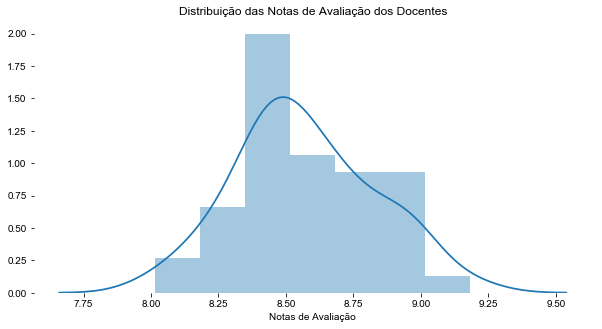

In [14]:
# criando uma figura
fig, ax = plt.subplots(figsize=(10,5))

# carregar a configuração padrão de cores do Seaborn
sns.set(font_scale=1.5)

sns.set_style('white')
sns.set_context("notebook")

#plotando distribuição da porcentagem de aprovação
sns.distplot(dados_finais["autoavaliacao_aluno_media"])

#renomeando xlabel
ax.set(xlabel='Notas de Avaliação')

plt.title('Distribuição das Notas de Avaliação dos Docentes')

#modificando aparência do gráfico
sns.despine(left=True, bottom=True)

#exibindo
plt.show()

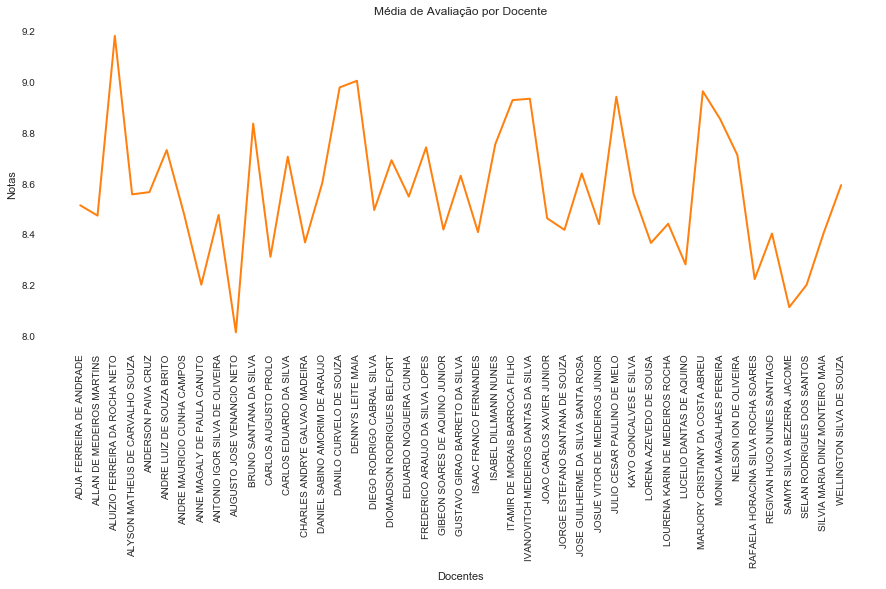

In [15]:
#definicao de cor
orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1,1,1)

#plotando dados
ax.plot(dados_finais['nome_docente'], dados_finais['autoavaliacao_aluno_media'] , c=orange, linewidth=2)

#limpando gráfico
ax.tick_params(top = 'off', bottom = 'off', left = 'off', right = 'off')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

#editando labels
plt.title('Média de Avaliação por Docente')
ax.set_xlabel("Docentes")
ax.set_ylabel("Notas")
plt.xticks(rotation=90)

#exibindo gráfico
plt.show(fig)

### Porcentagem de aprovação dos docentes

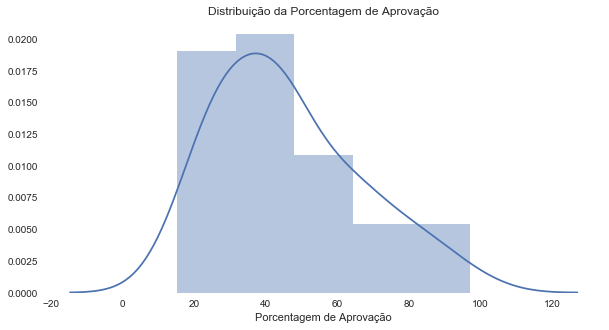

In [16]:
# criando uma figura
fig, ax = plt.subplots(figsize=(10,5))

# carregar a configuração padrão de cores do Seaborn
sns.set(font_scale=1.5)

sns.set_style('white')
sns.set_context("notebook")

#plotando distribuição da porcentagem de aprovação
sns.distplot(dados_finais["porcentagem_aprovacao"])

#renomeando eixo
ax.set(xlabel='Porcentagem de Aprovação')

plt.title("Distribuição da Porcentagem de Aprovação")

#modificando aparência do gráfico
sns.despine(left=True, bottom=True)

#exibindo
plt.show()

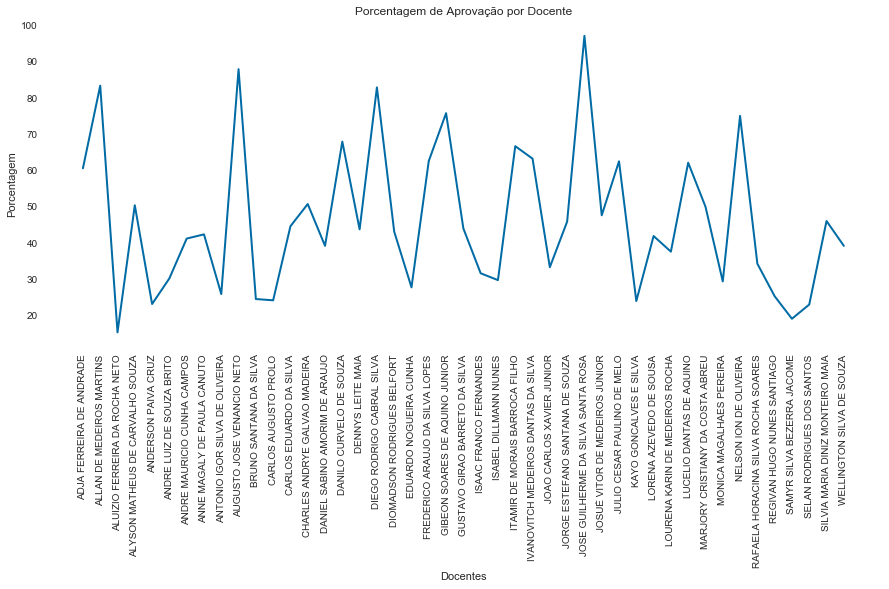

In [17]:
#definicao de cor
cb_dark_blue = (0/255,107/255,164/255)

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1,1,1)

#plotando dados
ax.plot(dados_finais['nome_docente'], dados_finais['porcentagem_aprovacao'] , c=cb_dark_blue, linewidth=2)

#limpando gráfico
ax.tick_params(top = 'off', bottom = 'off', left = 'off', right = 'off')
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

#editando labels
plt.title('Porcentagem de Aprovação por Docente')
ax.set_xlabel("Docentes")
ax.set_ylabel("Porcentagem")
plt.xticks(rotation=90)

#exibindo gráfico
plt.show(fig)

## Comparando dados

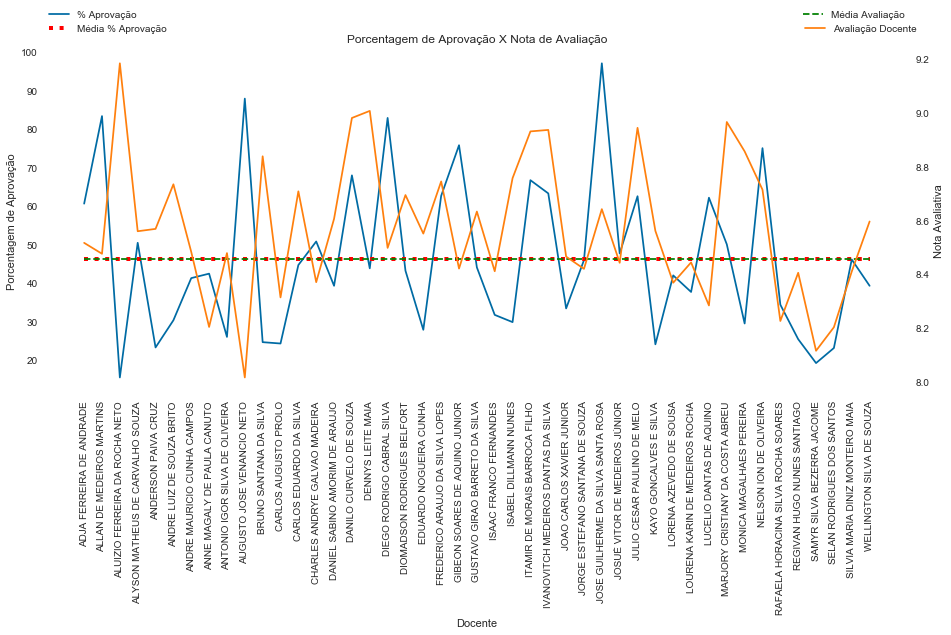

In [33]:
fig = plt.figure(figsize=(15, 6))
rect = rect = [0.1, 0.1, 0.8, 0.8]

x = dados_finais['nome_docente']
y1 = dados_finais['porcentagem_aprovacao']
y2 = dados_finais['autoavaliacao_aluno_media'] 

# média de aprovações 
med = sum(y1)/len(y1)
vec = np.empty(45)
vec.fill(med)
ax1bar = vec

# média de notas
med2 = sum(y2)/len(y2)
vec2 = np.empty(45)
vec2.fill(med)
ax2bar = vec2

# Create subplot, rect = [left, bottom, width, height] in normalized (0, 1) units
ax1 = plt.axes(rect)  

# Usando escala no lado esquerdo
ax1.yaxis.tick_left()  
plt.plot(x, y1, color=cb_dark_blue, label="% Aprovação")
plt.ylabel('Porcentagem de Aprovação')
plt.xlabel('Docente')

# Plotando a média de aprovações e de notas
plt.plot(x, ax1bar, color='red', label='Média % Aprovação', linestyle=':',linewidth = 4)
plt.plot(x, ax1bar, color='green', label='Média Avaliação', linestyle='--')

plt.xticks(rotation=90)

# Legenda do lado esquerdo
plt.legend(bbox_to_anchor=(0., 1.03, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)


# Usando escala no lado direito
ax2 = plt.axes(rect, frameon=False)  
ax2.yaxis.tick_right()
plt.plot(x, y2, color=orange, label="Avaliação Docente")
ax2.yaxis.set_label_position('right')
plt.ylabel('Nota Avaliativa')
ax2.set_xticks([])

# Legenda do lado esquerdo
plt.legend(bbox_to_anchor=(.8748, 1.03, 0.0, 0.0), loc=3, ncol=2, mode="expand", borderaxespad=0.)

#limpando gráfico
ax1.tick_params(top = 'off', bottom = 'off', left = 'off', right = 'off')
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)

#exibindo
plt.title('Porcentagem de Aprovação X Nota de Avaliação')
plt.show(fig)

# Referências

https://pt.wikipedia.org/wiki/Dados_abertos

http://dados.ufrn.br/group/ensino

https://github.com/ivanovitchm/imd0033_2018_1/blob/master/Trabalho_Unidade_2.ipynb